# Modeling

We perform multiple linear regression to model the revenue using budget and cast popularity as inputs.  These were the two most impactful features in the dataset, with r=0.72 and 0.3 respectively.

The model parametres are calculated as
```
rev = 502609.054 + 3.10546608 budget + 3257976.22 cast_popularity
```

In [15]:
import pandas as pd
import numpy as np

df = pd.read_csv("movies_cleaned.csv")
df.head()

,release_date,budget,revenue_worldwide,runtime,genres,cast_popularity_mean,cast_popularity_max,director_popularity,original_language,imdb_rating,imdb_votes,mpaa_rating,domestic_box_office,rotten_tomatoes_score,metacritic_score,season
0,2004-06-11,400000.0,46118097.0,95,['Comedy'],1.358067,2.4790,1.3126,en,7.0,251071.0,PG,44540956.0,72.0,64.0,Summer
1,2021-02-06,35000000.0,70000000.0,117,"['Animation', 'Fantasy', 'Action']",0.865500,1.3269,0.5921,zh,6.8,4451.0,TV-14,0.0,80.0,58.0,Winter
2,2021-02-12,35000000.0,83977925.5,115,"['Romance', 'Comedy', 'Drama']",3.196233,5.6727,0.2037,en,6.3,37385.0,TV-14,0.0,79.0,65.0,Winter
3,2003-05-30,94000000.0,940335536.0,100,"['Animation', 'Family']",1.427567,1.8011,1.2339,en,8.2,1185437.0,G,380843261.0,99.0,90.0,Spring
4,2000-09-01,12500000.0,40061153.0,140,"['Drama', 'Crime']",1.903567,2.5962,2.2434,en,7.9,122419.0,R,4184036.0,69.0,63.0,Fall


In [16]:
# (budget, cast_popularity_mean) -> revenue_worldwide
# rev = b1.bud + b2.cpop

def MLR(X, Y):
    # B = (XT.X)'.XT.Y

    XT = X.T
    XT_X = XT @ X
    XT_X_inv = np.linalg.pinv(XT_X)

    return XT_X_inv @ XT @ Y

# X = [[1, bud1, cpop1],
#      [1, bud2, cpop2],
#      [1, bud3, cpop3]]
# Y = [[rev1],
#      [rev2],
#      [rev3]]

revs = df['revenue_worldwide'].values
buds = df['budget'].values
cpops = df['cast_popularity_mean'].values

n = df.shape[0]

X = np.ones((n, 3))
for i in range(n):
    X[i][1] = buds[i]
    X[i][2] = cpops[i]

Y = np.ones((n, 1))
for i in range(n):
    Y[i][0] = revs[i]

b = MLR(X, Y)
b

array([[5.02609054e+05],
       [3.10546608e+00],
       [3.25797622e+06]])

In [ ]:
# therefore: pred_rev = 502609.054 + 3.10546608 bud + 3257976.22 cpop

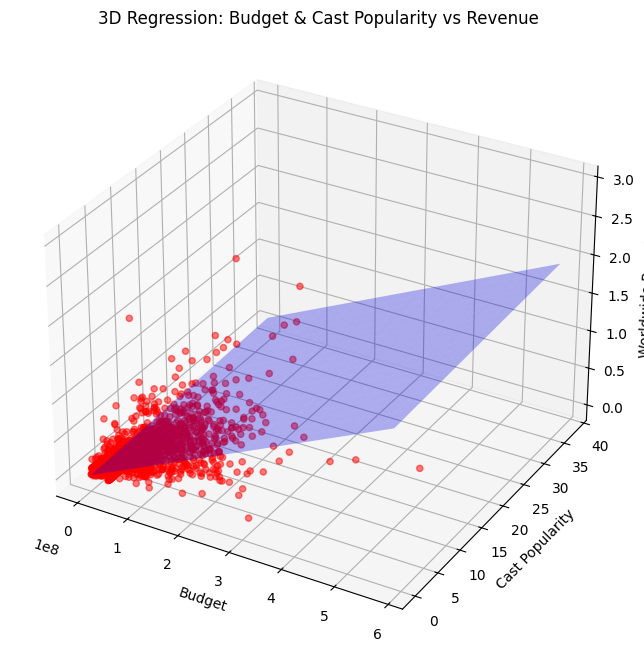

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x_data = df['budget']
y_data = df['cast_popularity_mean']
z_data = df['revenue_worldwide']

x_range = np.linspace(x_data.min(), x_data.max(), 20)
y_range = np.linspace(y_data.min(), y_data.max(), 20)
X_grid, Y_grid = np.meshgrid(x_range, y_range)

Z_grid = b[0] + b[1] * X_grid + b[2] * Y_grid

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_data, y_data, z_data, color='red', label='Actual Data', alpha=0.5)


ax.plot_surface(X_grid, Y_grid, Z_grid, color='blue', alpha=0.3)

ax.set_xlabel('Budget')
ax.set_ylabel('Cast Popularity')
ax.set_zlabel('Worldwide Revenue')

plt.title('3D Regression: Budget & Cast Popularity vs Revenue')
plt.show()